In [47]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#gather data
data = sns.load_dataset('penguins')

In [49]:
data.head(10)
#Bill is beak of penguin
#flipper is wing of penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [50]:
#see unique values
print(data['species'].unique())
print(data['island'].unique())
print(data['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


In [51]:
#remove the null rows
data = data.dropna()

In [52]:
#Values of the columns
data.columns.values[:]

array(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'], dtype=object)

In [53]:
#mean of bill_length and bill_depth
bill_length_mm_mean = data['bill_length_mm'].mean() #43.99
bill_depth_mm_mean = data['bill_depth_mm'].mean() #17.16
flipper_length_mm_mean = data['flipper_length_mm'].mean() #200.966
body_mass_g_mean = data['body_mass_g'].mean() #4207.05

In [54]:
#We need to predict the species of the penguins
data.rename(columns = {'species':'target'}, inplace = True)

In [94]:
#Feature dataset
X = pd.DataFrame(data.loc[:, data.columns.drop(['target'])])

In [77]:
X.head(10)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Torgersen,34.6,21.1,198.0,4400.0,Male


In [78]:
#Target dataset
y = data.loc[:,'target']

In [79]:
y = pd.DataFrame(y,columns = ['target'])

In [80]:
y.columns.values[::]

array(['target'], dtype=object)

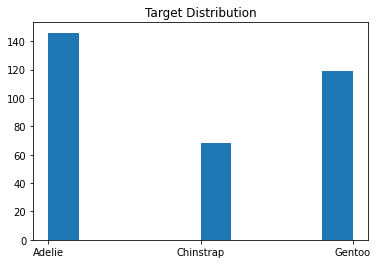

In [81]:
#visualizing the target variable using MatPlotlib
plt.hist(data.target)
plt.title('Target Distribution')
plt.show()

In [82]:
#Exploring all the features
X_numeric_col = list(X.select_dtypes('number').columns)
print(X_numeric_col)

X[X_numeric_col].describe().round(2)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.00,333.00,333.00,333.00
mean,43.99,17.16,200.97,4207.06
std,5.47,1.97,14.02,805.22
min,32.10,13.10,172.00,2700.00
25%,39.50,15.60,190.00,3550.00
50%,44.50,17.30,197.00,4050.00
75%,48.60,18.70,213.00,4775.00
max,59.60,21.50,231.00,6300.00


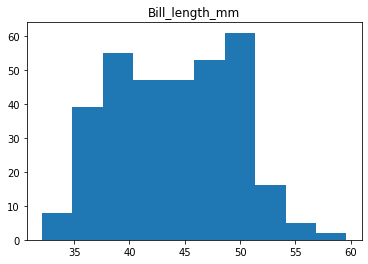

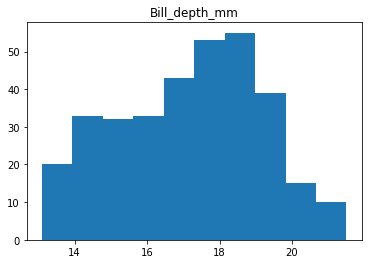

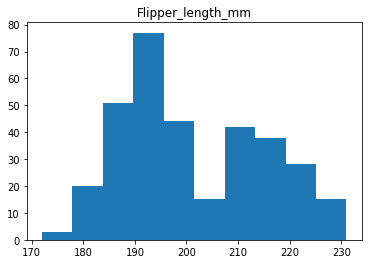

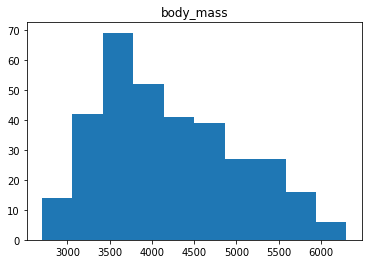

In [83]:
#Plotting all the graphs
#Graph 1 
plt.hist(data.bill_length_mm)
plt.title('Bill_length_mm')
plt.show()
        
#Graph2
plt.hist(data.bill_depth_mm)
plt.title('Bill_depth_mm')
plt.show()

#Graph3
plt.hist(data.flipper_length_mm)
plt.title('Flipper_length_mm')
plt.show()
         
#Graph4
plt.hist(data.body_mass_g)
plt.title('body_mass')
plt.show()

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

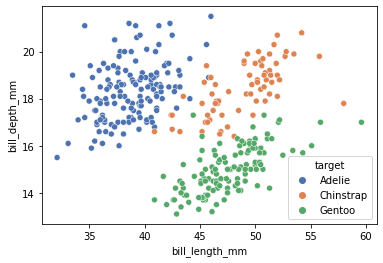

In [84]:
#Visualizing features on the basis of classes
sns.scatterplot(data=data, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'target', palette ='deep')

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

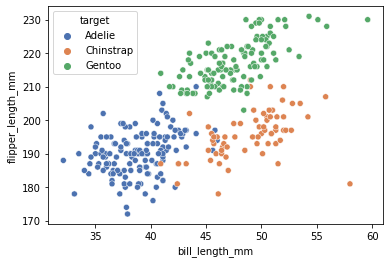

In [85]:
sns.scatterplot(data=data, x='bill_length_mm', y='flipper_length_mm', hue ='target', palette='deep')

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

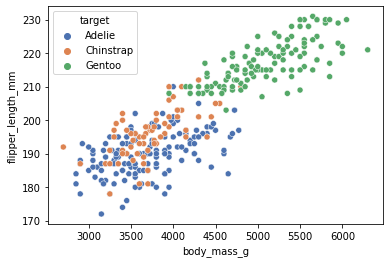

In [86]:
sns.scatterplot(data=data, x='body_mass_g', y='flipper_length_mm', hue ='target', palette='deep')

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_length_mm'>

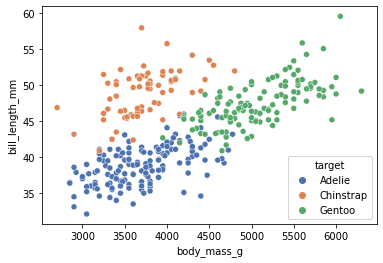

In [87]:
sns.scatterplot(data=data, x='body_mass_g', y='bill_length_mm', hue ='target', palette='deep')

In [88]:
#Encode the data into understandable format for the computer
from sklearn.preprocessing import OneHotEncoder
categ_col = X.select_dtypes(include=['object']).columns

In [89]:
categ_col
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [114]:
#Transforming input features for train and test dataset

df_X = pd.get_dummies(data, columns = categ_col)
df_y = pd.get_dummies(y, columns = ['target'])

In [122]:
df_X = df_X.drop(['target'], axis=1)

In [123]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(df_X)

In [124]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, random_state =1)

In [129]:
df_X_encoded_norm = norm.transform(df_X)


In [131]:
df_X_normalized = pd.DataFrame(df_X_encoded_norm)

In [132]:
df_X_normalized 

,0,1,2,3,4,5,6,7,8
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0,1.0,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0,1.0,0.0
3,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0,1.0,0.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1.0,0.0,0.0,1.0,0.0
329,0.534545,0.142857,0.728814,0.597222,1.0,0.0,0.0,1.0,0.0
330,0.665455,0.309524,0.847458,0.847222,1.0,0.0,0.0,0.0,1.0
331,0.476364,0.202381,0.677966,0.694444,1.0,0.0,0.0,1.0,0.0


In [134]:
# Import the KNN model
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [135]:
# Instantiate knn classifier with default setting
knn = KNeighborsClassifier(n_neighbors=10)
print("KNN Classifer with Default Setting: \n", knn)

KNN Classifer with Default Setting: 
 KNeighborsClassifier(n_neighbors=10)


In [136]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [137]:
knn.predict(X_train)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0,

In [138]:
#Test the model
predictions = knn.predict(X_test)
print("Model predictions on test data: \n", predictions)

Model predictions on test data: 
 [[1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 0 0]
 [1 0 0]]


In [139]:
knn.score(X_test, y_test)

0.65

In [141]:
model_check = (predictions == y_test.values)

In [142]:
model_check

array([[ True,  True,  True],
       [False,  True, False],
       [ True, False,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True, False,  True],
       [False, False,  True],
       [ True, False,  True],
       [False, False,  True],
       [False,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [Fa

In [ ]:
#Training and testing with Normalized values
